In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv("/content/drive/MyDrive/Tecmilenio/Hackaton/Iris.csv")
datos.head(n = 5) # Nombres de las columnas y primeros 5 registros

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
datos.info() # Información sobre los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Este dataset no contiene datos nulos (150 registros) y todas las columnas, a excepción del Id, son útiles pues se trata de las características cuantitativas de la flor: largo y ancho del sépalo y del pétalo

In [5]:
datos_clean = datos.drop(['Id'], axis=1) # Elimino la columna
datos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# ¿Cuántas especies de flor hay en el dataset?
datos_clean['Species'].nunique()

3

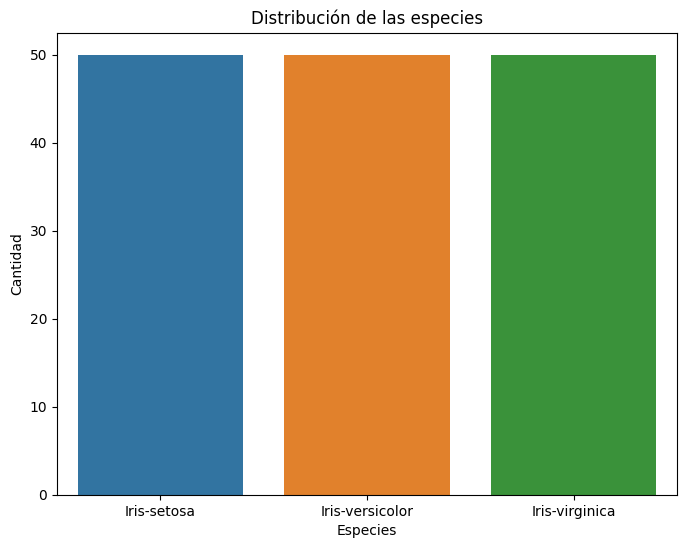

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=datos, x='Species')
plt.xlabel('Especies')
plt.ylabel('Cantidad')
plt.title('Distribución de las especies')
plt.show()

En el dataset hay 50 muestras de cada especie, y ya que ninguna tiene valores nulos, será sencillo crear un modelo para este conjunto.

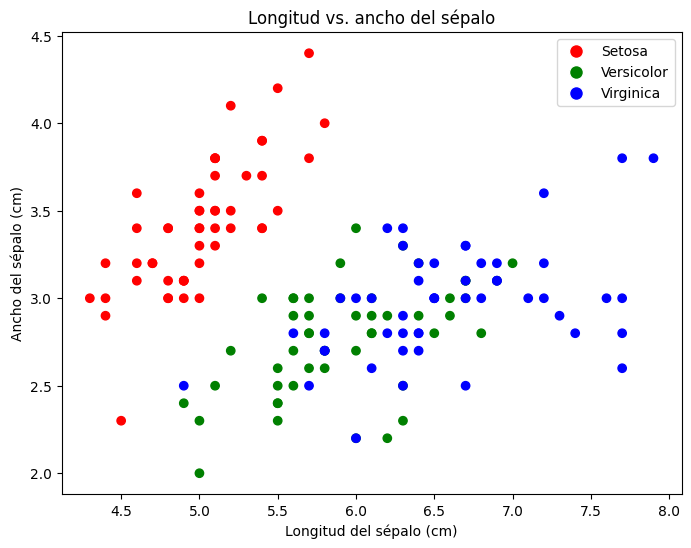

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(datos['SepalLengthCm'], datos['SepalWidthCm'], c=datos['Species'].map({'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}))
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Longitud vs. ancho del sépalo')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Setosa'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Versicolor'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Virginica')])
plt.show()

Como sabemos gracias a la Actividad #3, el modelo de regresión logística funciona tomando una combinación lineal de las características de entrada y aplicando una función logística (sigmoide) para obtener una probabilidad de que un ejemplo pertenezca a una clase particular. Si la probabilidad supera cierto umbral, se clasifica en esa clase.
Y ya que necesitamos predecir la probabilidad de que cierta flor pertenezca a una categoría específica, pareciera que la regresión logística es la mejor opción para este modelo. Sin embargo, la regresión logística es más adecuada para problemas de clasificación binaria o de dos clases. Para problemas de clasificación multiclase como este (son 3 especies de flores), utilizaremos una variante de la regresión logística llamada **regresión logística multinomial**, una extensión de la regresión logística que permite la clasificación en más de dos categorías.

De igual forma, utilizaremos las herramientas de modelado de [sklearn](https://scikit-learn.org/stable/).

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X serán las características de la flor, Y será la especie
X = datos_clean.drop(['Species'], axis=1)
y = datos_clean['Species']

# Divido los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # 31 es la semilla de generación de números aleatorios. Esto para poder replicar el comportamieto en futuras ejecuciones.

In [10]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

model.fit(X_train, y_train) # Ajusta el modelo a los datos de entrenamiento

y_pred = model.predict(X_test) # Realiza predicciones en el conjunto de prueba

# Calcula la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}\n')

# Muestra un informe de clasificación detallado
classification_rep = classification_report(y_test, y_pred)
print('Informe de clasificación: \n' + classification_rep)

Precisión del modelo: 1.0

Informe de clasificación: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
import pandas as pd #Biblioteca para importar datos.
import numpy as np #Biblioteca para crear arreglos.
import matplotlib.pyplot as plt #Biblioteca para plotear.
from sklearn.cluster import KMeans #Biblioteca para crear el algoritmo K-means (k-medias) para agrupamiento de datos
import seaborn as sns #Biblioteca para plotear datos con plantillas específicas.
from IPython.display import Image #Biblioteca para mostrar imágenes.
from google.colab import drive #Biblioteca para importar datos desde google drive.

import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

import PIL # Checar para adquirir las imágenes

In [13]:
X = pd.DataFrame()
X.loc[:,0] = datos.loc[:,'PetalLengthCm']
X.loc[:,1] = datos.loc[:,'PetalWidthCm']

cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(X)
X['predicted_label'] = cls.labels_.astype(int)
X.columns = ['PetalLengthCm', 'PetalWidthCm','label']
X

,PetalLengthCm,PetalWidthCm,label
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


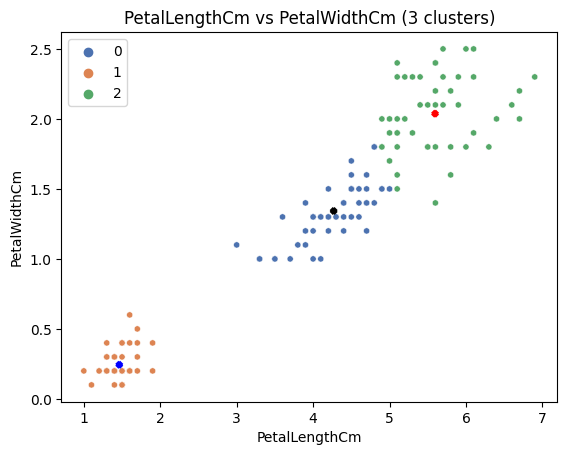

In [24]:
centroids = cls.cluster_centers_
labels = cls.labels_
print(centroids)
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="label",
                data=X, palette='deep', s=20);
plt.legend(loc='upper left');
plt.title("PetalLengthCm vs PetalWidthCm (3 clusters)")
#plt.xlim([-5, 5])
#plt.ylim([-5, 7])
plt.scatter(centroids_y,centroids_x,marker = "x", s=5,linewidths = 5, zorder = 5, c=['black','blue','red'])